In [7]:
import torch
from diffusers import AmusedInpaintPipeline
from diffusers.utils import load_image, make_image_grid

pipe = AmusedInpaintPipeline.from_pretrained(
    "amused/amused-512", variant="fp16", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

prompt = "fall mountains with warning sign say about 'forest fires'"
input_image = (
    load_image(
        "https://huggingface.co/datasets/diffusers/docs-images/resolve/main/open_muse/mountains_1.jpg"
    )
    .resize((512, 512))
    .convert("RGB")
)
mask = (
    load_image(
        "https://huggingface.co/datasets/diffusers/docs-images/resolve/main/open_muse/mountains_1_mask.png"
    )
    .resize((512, 512))
    .convert("L")
)
output = pipe(prompt, input_image, mask).images[0]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

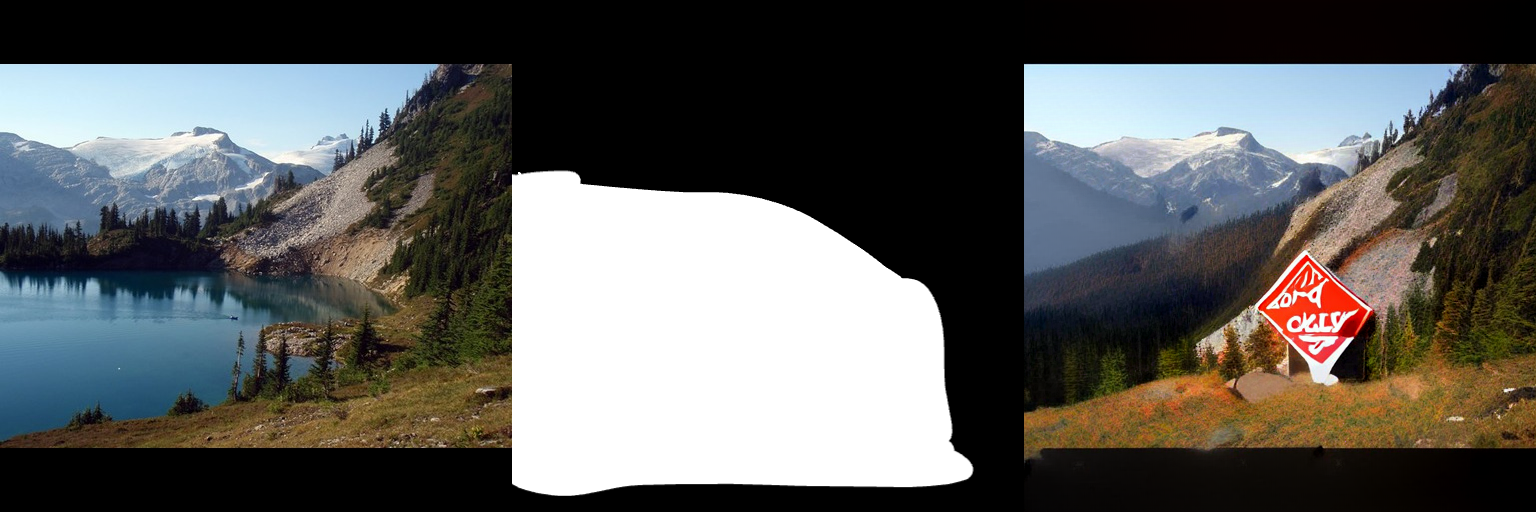

In [8]:
from diffusers.utils import load_image, make_image_grid
img = make_image_grid([input_image, mask, output], rows=1, cols=3)

display(img)

In [18]:
pmt= "A large array of colorful cupcakes, arranged on a maple table to spell 'MUSE'"

import torch
from diffusers import AmusedPipeline

pipe = AmusedPipeline.from_pretrained(
    "amused/amused-512", variant="fp16", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

image = pipe(pmt).images[0]
img = make_image_grid([input_image, image], rows=1, cols=2)


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

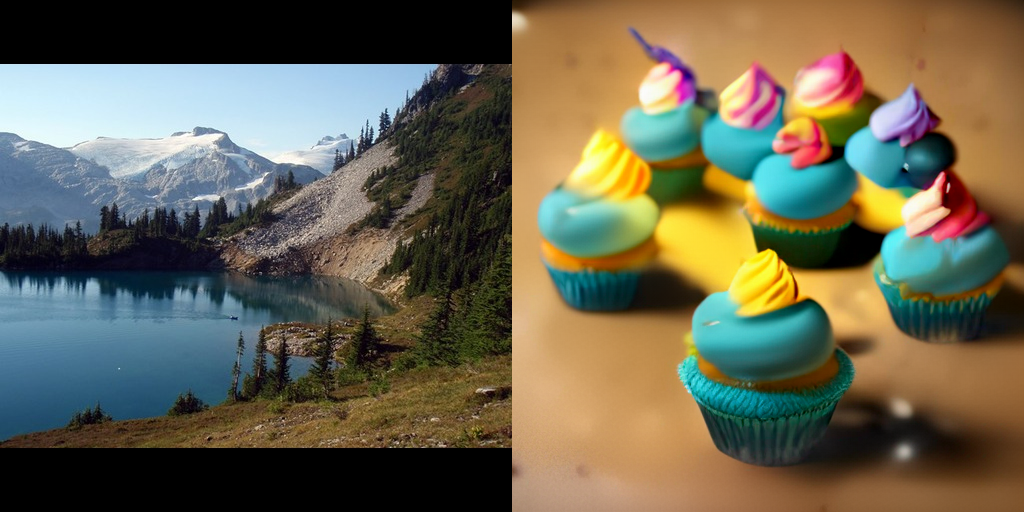

In [19]:
display(img)

In [20]:
import PIL
import requests
import torch
from io import BytesIO

from diffusers import StableDiffusionInstructPix2PixPipeline


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = "https://huggingface.co/datasets/diffusers/diffusers-images-docs/resolve/main/mountain.png"

image = download_image(img_url).resize((512, 512))

pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    "timbrooks/instruct-pix2pix", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")
prompt = "fall mountains with warning sign say about 'forest fires'"
# prompt = "make the mountains snowy"
out = pipe(prompt=prompt, image=image).images[0]
img = make_image_grid([input_image, out], rows=1, cols=2)


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

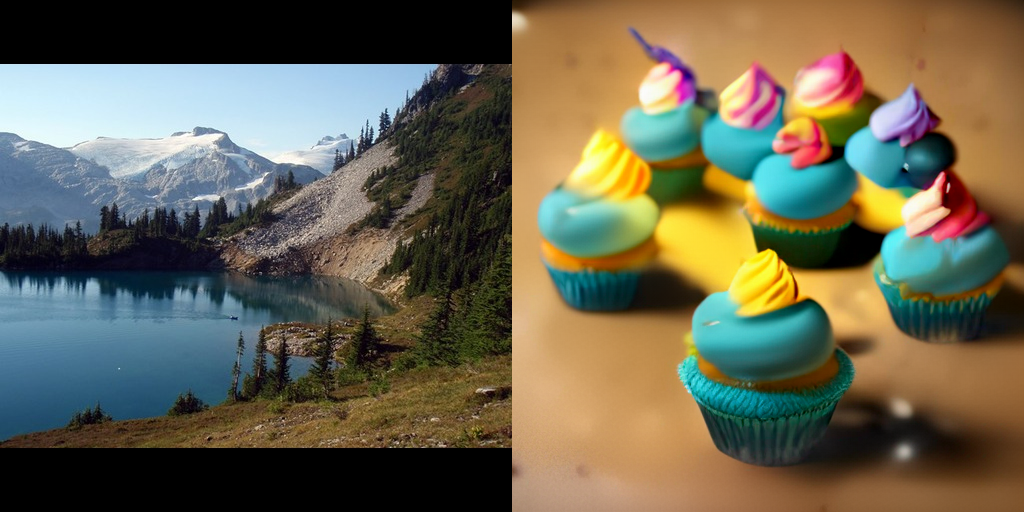

In [21]:
display(img)